In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggl4e/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('ggplot')


In [3]:
df=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [4]:
df.describe()

,id,Area_address_code,Permit_registration_year,registration_month,horse_power,mileage,naira_price
count,224524.000000,224524.000000,224524.000000,224524.000000,224524.000000,224524.000000,2.245240e+05
mean,167604.520118,51248.686626,2005.723789,5.929259,120.584245,201477.903053,2.262567e+06
std,96774.346590,25689.476180,7.264678,3.632565,193.819382,63785.499842,3.123100e+06
min,1.000000,1067.000000,1947.000000,0.000000,0.000000,8045.000000,1.800000e+05
25%,83894.500000,30952.000000,2002.000000,3.000000,75.000000,160900.000000,5.400000e+05
50%,167631.500000,50207.500000,2006.000000,6.000000,110.000000,241350.000000,1.260000e+06
75%,251440.250000,72116.000000,2010.000000,9.000000,150.000000,241350.000000,2.844000e+06
max,335109.000000,99998.000000,2018.000000,12.000000,20000.000000,241350.000000,8.820000e+07


In [5]:
df.dropna(axis=1, how='all', inplace = True)

In [6]:
df.drop_duplicates()
test.drop_duplicates()

,id,seller_type,country_of_use,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model
0,72959,private,london,2016-03-20,24768,Opel_vectra_B_1.6_16v_tuev_09.2017,limousine,2000,9,101,201125.0,gasoline,opel,nein,automatik,2016-03-20,2016-03-21,vectra
1,8681,private,london,2016-03-27,26629,Aixam_45_km/h_Auto_automatiek_nicht_fahrbereit,other,2005,6,0,32180.0,NaN,sonstige_autos,NaN,automatik,2016-03-27,2016-04-05,NaN
2,238202,private,london,2016-03-22,35606,Passat_Alltrack_Bluemotion,station wagon,2018,1,0,32180.0,diesel,volkswagen,ja,NaN,2016-03-22,2016-04-06,passat
3,110743,private,london,2016-03-28,59192,Opel_Kadett,limousine,1979,9,110,241350.0,gasoline,opel,nein,manuell,2016-03-28,2016-03-31,kadett
4,34925,private,london,2016-04-02,7551,"Seat_Arosa_""Anfaengerauto_Stadtflitzer""_TÜV_02...",small car,2000,8,0,241350.0,gasoline,seat,NaN,manuell,2016-04-02,2016-04-06,arosa
5,94697,private,london,2016-03-23,50969,Mercedes_Benz_E_200_CDI,limousine,2006,3,122,241350.0,diesel,mercedes_benz,nein,manuell,2016-03-23,2016-04-05,e_klasse
6,323736,private,london,2016-03-22,52353,Ford_Galaxy_1_9_TDI,bus,2004,0,1250,241350.0,diesel,ford,NaN,manuell,2016-03-22,2016-03-26,galaxy
7,72263,private,london,2016-03-30,74348,Volkswagen_Polo,small car,1999,2,50,241350.0,gasoline,volkswagen,nein,manuell,2016-03-30,2016-04-06,polo
8,140722,private,london,2016-03-05,74564,VW_Passat_1.6_mit_TÜV_bis_7.2017,limousine,1999,7,101,241350.0,gasoline,volkswagen,nein,manuell,2016-02-22,2016-03-14,passat
9,274262,private,london,2016-03-17,65510,VW_Kaefer_1303_S,convertible,1976,0,60,8045.0,gasoline,volkswagen,ja,manuell,2016-03-17,2016-04-05,kaefer


In [7]:
#Splitting company name from CarName column
CompanyName = df['car_brand'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['car_brand'],axis=1,inplace=True)
df.head()



,id,seller_type,country_of_use,CompanyName,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model,naira_price
0,34946,private,london,smart,2016-03-15,78183,Smart_smart_forfour_pulse,small car,2007,11,95,241350.0,gasoline,nein,manuell,2016-03-15,2016-03-16,forfour,864000
1,298886,private,london,seat,2016-04-01,47166,Seat_Arosa_1.4_16V,small car,2003,7,101,241350.0,gasoline,nein,manuell,2016-04-01,2016-04-03,arosa,630000
2,104362,private,london,opel,2016-03-17,44623,Woll_fahrbereit,small car,1999,8,90,241350.0,NaN,NaN,manuell,2016-03-17,2016-04-07,tigra,180000
3,300368,private,london,skoda,2016-03-29,53945,Skoda_Fabia_5_Tuerer_dunkelblau_metallic,limousine,2003,6,68,201125.0,gasoline,NaN,manuell,2016-03-29,2016-03-29,fabia,432000
4,207699,private,london,hyundai,2016-03-24,45886,Verkaufe_mein_Auto_#_Jeep_#_Hyundai_#_Tucson_#,other,2008,0,120,241350.0,NaN,NaN,automatik,2016-03-24,2016-04-05,tucson,1692000


In [8]:
#Splitting company name from CarName column test data
CompanyName = test['car_brand'].apply(lambda x : x.split(' ')[0])
test.insert(3,"CompanyName",CompanyName)
test.drop(['car_brand'],axis=1,inplace=True)
test.head()

,id,seller_type,country_of_use,CompanyName,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model
0,72959,private,london,opel,2016-03-20,24768,Opel_vectra_B_1.6_16v_tuev_09.2017,limousine,2000,9,101,201125.0,gasoline,nein,automatik,2016-03-20,2016-03-21,vectra
1,8681,private,london,sonstige_autos,2016-03-27,26629,Aixam_45_km/h_Auto_automatiek_nicht_fahrbereit,other,2005,6,0,32180.0,NaN,NaN,automatik,2016-03-27,2016-04-05,NaN
2,238202,private,london,volkswagen,2016-03-22,35606,Passat_Alltrack_Bluemotion,station wagon,2018,1,0,32180.0,diesel,ja,NaN,2016-03-22,2016-04-06,passat
3,110743,private,london,opel,2016-03-28,59192,Opel_Kadett,limousine,1979,9,110,241350.0,gasoline,nein,manuell,2016-03-28,2016-03-31,kadett
4,34925,private,london,seat,2016-04-02,7551,"Seat_Arosa_""Anfaengerauto_Stadtflitzer""_TÜV_02...",small car,2000,8,0,241350.0,gasoline,NaN,manuell,2016-04-02,2016-04-06,arosa


[Text(0, 0.5, 'Frequency distribution of gear_type'),
 Text(0.5, 0, 'gear_type')]

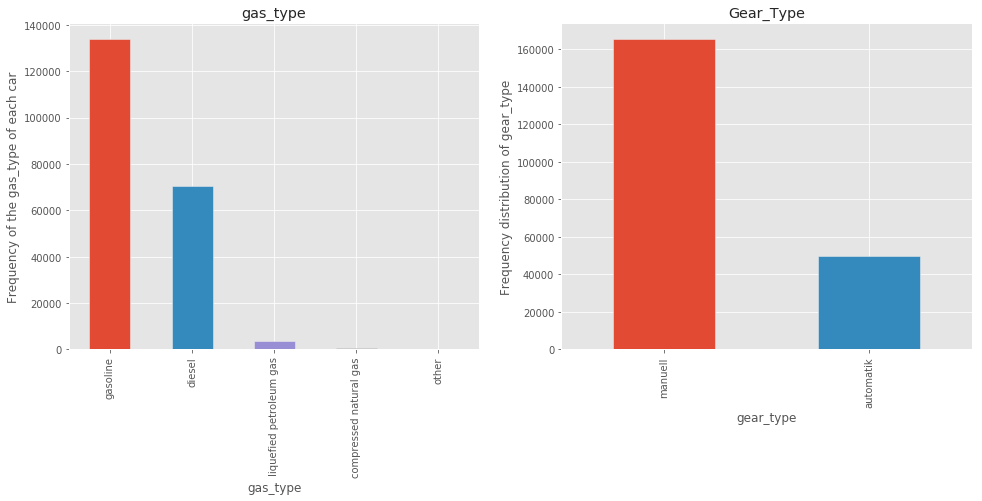

In [9]:
#Visualizing dataset
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.gas_type.value_counts().plot('bar')
plt.title('gas_type')
plt1.set(xlabel = 'gas_type', ylabel='Frequency of the gas_type of each car')

plt.subplot(1,3,2)
plt2 = df.gear_type.value_counts().plot('bar')
plt.title('Gear_Type')
plt2.set(xlabel = 'gear_type', ylabel='Frequency distribution of gear_type')



[Text(0, 0.5, 'Frequency of car_type'), Text(0.5, 0, 'car_type')]

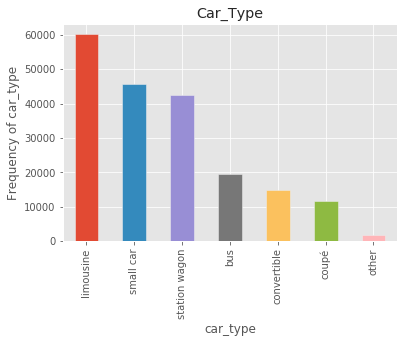

In [10]:
plt2 = df.car_type.value_counts().plot('bar')
plt.title('Car_Type')
plt2.set(xlabel = 'car_type', ylabel='Frequency of car_type')

In [11]:
#drop columns on test data

test_data = test.drop(["seller_type", "country_of_use", "CompanyName", "Area_address_code", "weblog_date", "car_name", "registration_month", "horse_power", "Permit_registration_year", "Area_address_code", "date_of_advert", "last_advert_online"], axis=1)

In [12]:
train = df.drop(["id", "seller_type", "country_of_use", "CompanyName", "Area_address_code", "weblog_date", "car_name", "registration_month", "horse_power", "Permit_registration_year", "Area_address_code", "date_of_advert", "last_advert_online"], axis=1)

In [13]:
train.head()

,car_type,mileage,gas_type,Status_of_car_repair,gear_type,model,naira_price
0,small car,241350.0,gasoline,nein,manuell,forfour,864000
1,small car,241350.0,gasoline,nein,manuell,arosa,630000
2,small car,241350.0,NaN,NaN,manuell,tigra,180000
3,limousine,201125.0,gasoline,NaN,manuell,fabia,432000
4,other,241350.0,NaN,NaN,automatik,tucson,1692000


In [14]:
test_data.head()

,id,car_type,mileage,gas_type,Status_of_car_repair,gear_type,model
0,72959,limousine,201125.0,gasoline,nein,automatik,vectra
1,8681,other,32180.0,NaN,NaN,automatik,NaN
2,238202,station wagon,32180.0,diesel,ja,NaN,passat
3,110743,limousine,241350.0,gasoline,nein,manuell,kadett
4,34925,small car,241350.0,gasoline,NaN,manuell,arosa


In [15]:
#train data
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["car_type", "gas_type", "Status_of_car_repair", "gear_type", "model"]
train=dummy_data(train, dummy_columns)

In [16]:
train.head()

,mileage,naira_price,car_type_bus,car_type_convertible,car_type_coupé,car_type_limousine,car_type_other,car_type_small car,car_type_station wagon,gas_type_compressed natural gas,...,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira
0,241350.0,864000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,241350.0,630000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,241350.0,180000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201125.0,432000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,241350.0,1692000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data.head()

,id,car_type,mileage,gas_type,Status_of_car_repair,gear_type,model
0,72959,limousine,201125.0,gasoline,nein,automatik,vectra
1,8681,other,32180.0,NaN,NaN,automatik,NaN
2,238202,station wagon,32180.0,diesel,ja,NaN,passat
3,110743,limousine,241350.0,gasoline,nein,manuell,kadett
4,34925,small car,241350.0,gasoline,NaN,manuell,arosa


In [18]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["mileage"] = scaler.fit_transform(data["mileage"].values.reshape(-1,1))
    return data
train_data = normalize_age(train)
train_data.head()

,mileage,naira_price,car_type_bus,car_type_convertible,car_type_coupé,car_type_limousine,car_type_other,car_type_small car,car_type_station wagon,gas_type_compressed natural gas,...,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira
0,1.000000,864000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.000000,630000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.000000,180000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.827586,432000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,1692000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#test data
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["mileage"] = scaler.fit_transform(data["mileage"].values.reshape(-1,1))
    return data
test_data = normalize_age(test_data)
test_data.head()

,id,car_type,mileage,gas_type,Status_of_car_repair,gear_type,model
0,72959,limousine,0.827586,gasoline,nein,automatik,vectra
1,8681,other,0.103448,NaN,NaN,automatik,NaN
2,238202,station wagon,0.103448,diesel,ja,NaN,passat
3,110743,limousine,1.000000,gasoline,nein,manuell,kadett
4,34925,small car,1.000000,gasoline,NaN,manuell,arosa


In [20]:
# Spliting target variable and independent variables
X = train_data.drop(['naira_price'], axis = 1)
y = train_data['naira_price']

In [21]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Value of y intercept
lm.intercept_

4940552.246336909

In [23]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,mileage,-4.46752e+06
1,car_type_bus,-73938.3
2,car_type_convertible,1.05296e+06
3,car_type_coupé,1.33022e+06
4,car_type_limousine,68571.5
5,car_type_other,-458597
6,car_type_small car,-299439
7,car_type_station wagon,193451
8,gas_type_compressed natural gas,426642
9,gas_type_diesel,922652


In [24]:
# Model prediction on train data
y_pred = lm.predict(X)

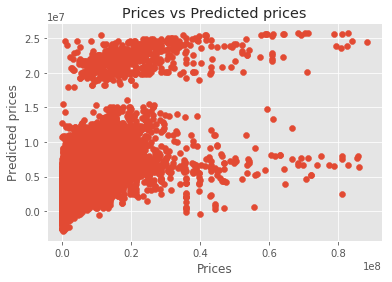

In [25]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [26]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X, y)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[08:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
# Model prediction on train data
y_predict = reg.predict(X)

In [28]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X)

In [29]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [30]:
# Model prediction on train data
y_prediction = reg.predict(X)

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [31]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
# Model prediction on train data
y_predict_ = reg.predict(X)

In [33]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y,y_pred)#linear regression

0.5031112070805823

In [34]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y,y_predict_)#Random forest classifier

0.70631565726797

In [35]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y,y_predict)#Xgboost

0.5407090421311593

In [36]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y,y_prediction)#DSVC

NameError: name 'y_prediction' is not defined

In [37]:
submission = pd.DataFrame({"id":df["id"],
                           "naira_price":y_predict_})
submission.to_csv("hi.csv", index=False)

In [38]:
submission.head()

,id,naira_price
0,34946,8.970394e+05
1,298886,4.504232e+05
2,104362,3.191152e+05
3,300368,1.006518e+06
4,207699,1.879200e+06


In [39]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)#for svm classifier

NameError: name 'y_test' is not defined